## 텍스트 분류
---
- 정상메일/스팸메일 내용을 학습 후 스팸 메일 분류
- 텍스트 데이터 전처리
    * 1단계 : 데이터 확인 및 기본적인 처리 (결측치, 중복 등등)
    * 2단계 : 텍스트 데이터 전처리
        - 정  제 : 불용어 및 노이즈 데이터 제거 
        - 토큰화 : 텍스트 데이터 토큰 단위 분할 => 단어 사전 생성
        - 정  제 : 불용어 및 노이즈 데이터 제거 
        - 정수 정규화 : 정수 인코딩
        - 패  딩 : 가변 텍스트 데이터 => 고정 텍스트 데이터
        - 이진 정규화 : 원-핫-인코딩  => 임베딩

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### [1] 데이터 준비

In [422]:
FILE='./spam.csv'

In [423]:
dataDF = pd.read_csv(FILE, encoding='latin1')
print('총 샘플의 수 :',len(dataDF))

총 샘플의 수 : 5572


In [424]:
# 데이터 확인
print(dataDF.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


### [2] 데이터 전처리
---

#### [2-1] 데이터 확인 및 1차 처리

In [425]:
dataDF.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [426]:
dataDF.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [427]:
# 결측치 체크
dataDF.isnull().sum()

v1    0
v2    0
dtype: int64

In [428]:
# 중복 데이터 체크 및 삭제
dataDF.duplicated().sum()

403

In [429]:
dataDF.drop_duplicates(subset=['v2'], inplace=True)

In [430]:
print(f'dataDF 수 : {len(dataDF)}')

dataDF 수 : 5169


In [431]:
dataDF['v1'] = dataDF['v1'].replace(['ham','spam'],[0,1])
dataDF.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [432]:
# 데이터 분포 확인
v1_DF=dataDF['v1'].value_counts()
print(f'v1_DF[0] = {v1_DF[0]}, v1_DF[1] = {v1_DF[1]}, dataDF.shape = {dataDF.shape}')

v1_DF[0] = 4516, v1_DF[1] = 653, dataDF.shape = (5169, 2)


In [433]:
print(f'정상메일 : {round(v1_DF[0]/dataDF.shape[0],2)}%')
print(f'스팸메일 : {round(v1_DF[1]/dataDF.shape[0],2)}%')

정상메일 : 0.87%
스팸메일 : 0.13%


In [434]:
# 비율에 맞게 학습/테스트 데이터 분활
from sklearn.model_selection import train_test_split

In [435]:
# 비율에 맞게 분할
X_train, X_test, y_train, y_test = train_test_split(dataDF['v2'], 
                                                    dataDF['v1'], 
                                                    test_size=0.2, 
                                                    stratify=dataDF['v1'],
                                                    random_state=11)

print(f'X_train : {X_train.shape}, X_test : {X_test.shape}')

X_train : (4135,), X_test : (1034,)


In [436]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.2, 
                                                  stratify=y_train,
                                                  random_state=11)
print(f'X_train : {X_train.shape}, X_test : {X_test.shape} , X_val : {X_val.shape}')

X_train : (3308,), X_test : (1034,) , X_val : (827,)


In [437]:
print(f'학습 데이터 -----------------')
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'정상메일 : {round(y_train.value_counts()[0]/len(y_train),2)}%')
print(f'스팸메일 : {round(y_train.value_counts()[1]/len(y_train),2)}%')

print(f'\n테스트 데이터 -----------------')
print(f'X_test   : {X_test.shape}, y_test : {y_test.shape}')
print(f'정상메일 : {round(y_test.value_counts()[0]/len(y_test),2)}%')
print(f'스팸메일 : {round(y_test.value_counts()[1]/len(y_test),2)}%')

print(f'\n검증 데이터 -----------------')
print(f'X_val    : {X_val.shape}, y_val : {y_val.shape}')
print(f'정상메일 : {round(y_val.value_counts()[0]/len(y_val),2)}%')
print(f'스팸메일 : {round(y_val.value_counts()[1]/len(y_val),2)}%')

학습 데이터 -----------------
X_train : (3308,), y_train : (3308,)
정상메일 : 0.87%
스팸메일 : 0.13%

테스트 데이터 -----------------
X_test   : (1034,), y_test : (1034,)
정상메일 : 0.87%
스팸메일 : 0.13%

검증 데이터 -----------------
X_val    : (827,), y_val : (827,)
정상메일 : 0.87%
스팸메일 : 0.13%


#### [2-2] 데이터 벡터화

In [438]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [439]:
# 텍스트 데이터 토큰화 진행 
def makeToken(textData, numWord=0):
    if numWord>0:
        myToken=Tokenizer(num_words=numWord)
    else:
        myToken=Tokenizer()
    
    # 단어사전(voca) 생성
    myToken.fit_on_texts(textData)
    
    return myToken


In [440]:
# 단어사전에서 단어별 빈도 체크
def checkWordCount(tokenizer, freq_num=10):
    threshold = freq_num                  # 낮은 빈도 수 
    total_cnt = len(tokenizer.word_index) # 전체 단어 수
    low_cnt   = 0                         # 빈도수가 threshold보다 작은 단어 개수 카운트
    total_freq = 0                        # 데이터의 전체 단어 빈도수 총 합
    low_freq = 0                          # threshold보다 작은 단어 빈도수 총 합

    # 전체 단어 빈도수와 낮은 빈도의 단어 수 계산
    for key, value in tokenizer.word_counts.items():
        total_freq = total_freq + value

        # threshold보다 빈도수가 낮은 단어 수 누적
        if(value < threshold):
            low_cnt = low_cnt + 1
            low_freq = low_freq + value
            
        # 단어사전 단어 수 설정
        voca_num_word = (total_cnt - low_cnt)+ 1  # 패딩 0 추가되는 것 때문에 +1
    return total_cnt, total_freq, low_cnt, low_freq, voca_num_word

In [441]:
# 단어사전 크기 체크 위한 토큰화 진행 
dataToken=makeToken(X_train)
word_count= len(dataToken.word_index)

print(f'dataToken.word_index : {word_count}')

dataToken.word_index : 6917


In [442]:
total_cnt, total_freq, low_cnt, low_freq, voca_word_num = checkWordCount(dataToken, 2)

In [443]:
print(f"전체 토큰(단어) 수 : {total_cnt}개")
print(f"전체 토큰(단어) 빈도 수 : {total_freq}개")
print('------------------------------------------')
print(f"등장 빈도 낮은 단어   수 :{low_cnt}  {round((low_cnt / total_cnt)*100)}%") 
print(f"등장 빈도 낮은 단어 비율 :{low_freq} {round((low_freq / total_freq)*100)}%")
print('------------------------------------------')
print(f"단어사전 단어 수 : {voca_word_num}개")

전체 토큰(단어) 수 : 6917개
전체 토큰(단어) 빈도 수 : 52048개
------------------------------------------
등장 빈도 낮은 단어   수 :3877  56%
등장 빈도 낮은 단어 비율 :3877 7%
------------------------------------------
단어사전 단어 수 : 3041개


In [444]:
# 지정된 단어사전 단어 수로 데이터 수치화
dataToken=makeToken(X_train, voca_word_num)
word_count= len(dataToken.word_index)

print(f'dataToken.word_index : {word_count}')

dataToken.word_index : 6917


In [445]:
seq_train=dataToken.texts_to_sequences(X_train)
seq_test=dataToken.texts_to_sequences(X_test)
seq_val=dataToken.texts_to_sequences(X_val)

In [446]:
print(len(seq_train), seq_train[0], sep='\n')
print(len(seq_test), seq_test[0], sep='\n')
print(len(seq_val), seq_val[0], sep='\n')

3308
[319, 32]
1034
[133, 311, 311, 1060]
827
[2, 21, 4, 436]


In [447]:
# 패딩 길이 설정 
def checkDataLength(datas):
    length=[len(data) for data in datas]
    
    plt.hist(length)
    plt.title(f'Max {max(length)}  Min {min(length)}  AVG {round(sum(length)/len(length),2)}')
    plt.xlabel('data length')
    plt.ylabel('data number')
    plt.show()
    return length

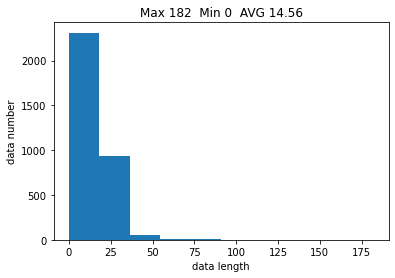

In [448]:
length=checkDataLength(seq_train)

In [449]:
pad_length=max(length)
X_train = pad_sequences(seq_train, maxlen=pad_length)
X_test = pad_sequences(seq_test, maxlen=pad_length)
X_val = pad_sequences(seq_val, maxlen=pad_length)

In [450]:
X_train.shape, X_test.shape, X_val.shape

((3308, 182), (1034, 182), (827, 182))

In [451]:
y_train.shape, y_test.shape, y_val.shape

((3308,), (1034,), (827,))

## MODEL 구성 및 구현
---
- 목  표 : 메일 내용 분석 후 스팸 메일 분류
- 데이터 : 수치화된 벡터 데이터 
    * 데이터 수 : 학습용 4135 , 테스트용
    

In [452]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### 모델 구성
---
- Embedding Layer : PADDING_LENGTH => EMB_DIM 으로 변환
- RNN Layer

In [453]:
EMB_DIM = 32                     # 임베딩 벡터 크기 
WORD_NUM = voca_word_num         # 단어사전 수
HIDDEN_NODE = 10                 # 은닉층 뉴런 수
INPUT_LENGH = pad_length         # 1문장의 토큰 수 

In [454]:
INPUT_LENGH

182

In [455]:
model = Sequential()
model.add(Embedding(WORD_NUM, EMB_DIM, input_length=INPUT_LENGH))
model.add(SimpleRNN(HIDDEN_NODE))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 182, 32)           97312     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 10)                430       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 97,753
Trainable params: 97,753
Non-trainable params: 0
_________________________________________________________________


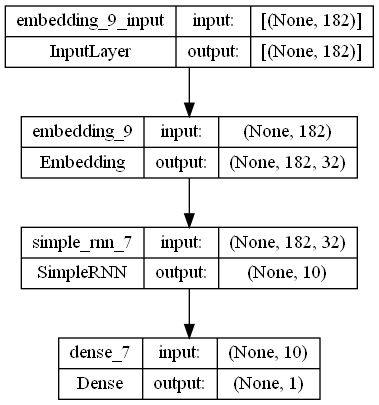

In [456]:
plot_model(model, show_shapes=True)

### 모델 생성 
---

In [457]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

### 학습
---

In [459]:
history = model.fit(X_train,
                    y_train, 
                    epochs=4, 
                    batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/4
52/52 [==============================] - 4s 37ms/step - loss: 0.4907 - acc: 0.8785 - val_loss: 0.3612 - val_acc: 0.9528
Epoch 2/4
52/52 [==============================] - 2s 35ms/step - loss: 0.2655 - acc: 0.9649 - val_loss: 0.2208 - val_acc: 0.9565
Epoch 3/4
52/52 [==============================] - 2s 37ms/step - loss: 0.1587 - acc: 0.9804 - val_loss: 0.1525 - val_acc: 0.9661
Epoch 4/4
52/52 [==============================] - 2s 32ms/step - loss: 0.0996 - acc: 0.9882 - val_loss: 0.1163 - val_acc: 0.9734


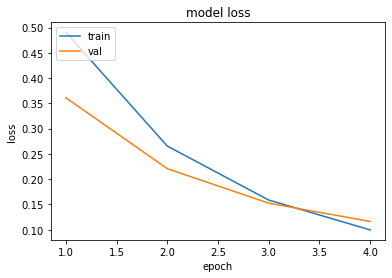

In [460]:
# 학습 히스토리 시각화
epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()